In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
titanic = sns.load_dataset('titanic')[['survived', 'pclass', 'age', 'parch', 'sibsp', 'fare']].dropna()
x = titanic.drop('survived', axis = 1)
y = titanic['survived']

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [5]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
acc_rfc = rfc.score(x_test, y_test)
print('The accuracy of the Random Forest Classifier is:', acc_rfc * 100, '%')


The accuracy of the Random Forest Classifier is: 67.13286713286713 %


In [6]:
x_test["y_initial"]=y_test
x_test["y_pred"]=y_pred

<ipython-input-6-78482d6c90e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_initial"]=y_test
<ipython-input-6-78482d6c90e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test["y_pred"]=y_pred


In [8]:
x_test["y_initial"].value_counts()

0    88
1    55
Name: y_initial, dtype: int64

In [9]:
x_test["y_pred"].value_counts()

0    91
1    52
Name: y_pred, dtype: int64

In [10]:
pd.crosstab(x_test["y_initial"],x_test["y_pred"])

y_pred,0,1
y_initial,,
0,66,22
1,25,30


In [11]:
from sklearn import metrics
metrics.confusion_matrix(x_test["y_initial"],x_test["y_pred"])

array([[66, 22],
       [25, 30]], dtype=int64)

In [12]:
x_test.to_excel(r"C:\Users\HP\Downloads\example.xlsx")

In [14]:
#print accuracy of model
print(metrics.accuracy_score(x_test["y_initial"],x_test["y_pred"]))

0.6713286713286714


In [15]:
#print precision value of model
print(metrics.precision_score(x_test["y_initial"],x_test["y_pred"]))

0.5769230769230769


In [16]:
#print recall value of model
print(metrics.recall_score(x_test["y_initial"],x_test["y_pred"]))

0.5454545454545454


In [18]:
#print f1 value of model
from sklearn.metrics import f1_score
print(metrics.f1_score(x_test["y_initial"],x_test["y_pred"]))

0.5607476635514018


In [19]:

from sklearn.metrics import roc_auc_score
print(metrics.roc_auc_score(x_test["y_initial"],x_test["y_pred"]))


0.6477272727272727


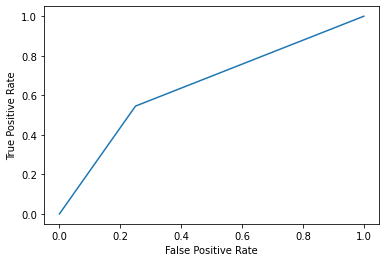

In [21]:
fpr, tpr, thresholds = metrics.roc_curve(x_test["y_initial"],x_test["y_pred"])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr)
display.plot()
plt.show()

In [22]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

tpot: 0.11.7


C:\Users\HP\anaconda3\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [31]:
from tpot import TPOTClassifier

In [33]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [34]:
pipeline_optimizer.fit(x_train, y_train)


Generation 1 - Current best internal CV score: 0.7337909992372234

Generation 2 - Current best internal CV score: 0.7337909992372234

Generation 3 - Current best internal CV score: 0.7337909992372234

Generation 4 - Current best internal CV score: 0.7337909992372234

Generation 5 - Current best internal CV score: 0.7337909992372234

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=8, min_samples_split=4, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)